<a href="https://colab.research.google.com/github/s-prak/FMML_Projects_and_Labs/blob/main/Copy_of_FMML_Module_5_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Module 5 Lab 1

# Non Linear Support Vector Machines

```
Module Coordinator : Akshit Garg
```



In [1]:
#Importing the necessary packages
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split

from sklearn import svm

import pandas
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt


The topic of classifier in today's lab, SVMs make for really good linear separators. Let us look at an example which has linearly separable data:

Here's some information about numpy.random.multivariate_normal:

Function Signature:
python
Copy code
numpy.random.multivariate_normal(mean, cov, size=None, check_valid='warn', tol=1e-8)
Parameters:
mean: Mean of the distribution (1-D array of length N).

cov: Covariance matrix of the distribution (2-D array of shape (N, N)).

size: Output shape. If size is None (default), a single sample is returned. If size is an integer, it specifies the number of samples to generate. If size is a tuple, it specifies the shape of the output array.

check_valid: Default is 'warn'. If 'warn', a warning is emitted when the determinant of the covariance matrix is close to zero. If 'raise', an error is raised. If 'ignore', no check is performed.

tol: Tolerance when checking the singular values in covariance matrix. Default is 1e-8.

Returns:
An array containing samples drawn from the multivariate normal distribution.

In Python, the backslash (\) is used as a line continuation character. It allows you to continue a statement on the next line. In your code snippet, the backslashes are used to break a long line into multiple lines for better readability.

Here, np.arange is used to create arrays of evenly spaced values within a specified range. The function call np.arange(x_min, x_max, 0.1) generates an array ranging from x_min to x_max with a step size of 0.1. Similarly, np.arange(y_min, y_max, 0.1) generates an array for the y-axis.

Now, np.meshgrid takes these two 1D arrays and returns two 2D arrays representing the Cartesian product of the input arrays. In other words, it creates a grid of coordinates by pairing each combination of x and y values.



`ravel()` is a function in NumPy that returns a flattened one-dimensional array containing the elements of the input array. It is used to convert a multi-dimensional array into a 1D array without making a copy of the original data. The resulting array shares the same data as the original array.

Here's a simple example to illustrate the use of `ravel()`:

```python
import numpy as np

# Creating a 2D array
arr_2d = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

# Using ravel() to flatten the array
arr_1d = arr_2d.ravel()

print("Original 2D array:")
print(arr_2d)

print("\nFlattened 1D array:")
print(arr_1d)
```

In this example, `arr_2d.ravel()` will convert the 2D array `arr_2d` into a 1D array `arr_1d`. The output will look like:

```
Original 2D array:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Flattened 1D array:
[1 2 3 4 5 6 7 8 9]
```

Keep in mind that `ravel()` returns a flattened view of the original array, so if you modify the elements in the flattened array, it will affect the original array, and vice versa. If you need a completely independent copy of the data, you can use the `flatten()` method instead of `ravel()`. The difference is that `flatten()` always returns a copy, while `ravel()` returns a view if possible, or a copy if necessary.


plt.contourf is a function in the Matplotlib library, which is widely used for creating static, interactive, and animated plots in Python. Specifically, plt.contourf is used to create filled contour plots. Contour plots are graphical representations of three-dimensional data in two dimensions, where the contours represent constant values.

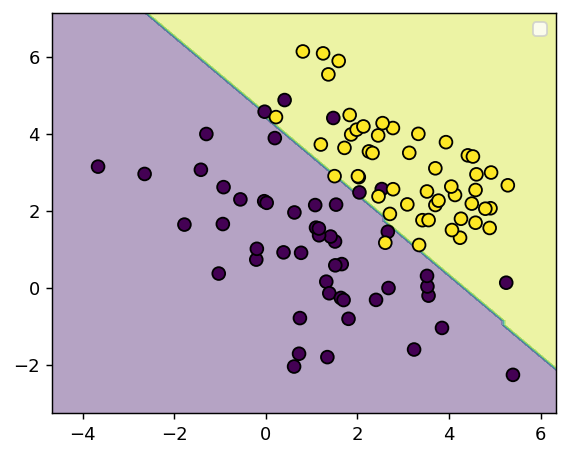

In [2]:
np.random.seed(0)

ar = np.vstack(     [\
                    np.random.multivariate_normal(np.array([1, 1]), 1.5 * np.array([[2, -1], [-1, 2.0]]), size = 50, ),\
                    np.random.multivariate_normal(np.array([3, 3]), 2 * np.array([[0.75, -0.5], [-0.5, 0.75]]), size = 50, )
                    ]\
              )

testAr = np.vstack(   [\
                      np.random.multivariate_normal(np.array([1, 1]), np.array([[0.5, -0.25], [-0.25, 0.5]]), size = 500, ),\
                      np.random.multivariate_normal(np.array([3, 3]), np.array([[0.75, -0.5], [-0.5, 0.75]]), size = 500, )
                      ]\
                  )
testy = np.array([0] * int((testAr.shape[0]/2)) + [1] * int((testAr.shape[0]/2)))

X = ar
y = np.array([0] * int((ar.shape[0]/2)) + [1] * int((ar.shape[0]/2)))

def plotDecisionBoundary(X, y, pair, clf):
  x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
  y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))

  y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  y_pred = y_pred.reshape(xx.shape)
  plt.figure(figsize=(5,4))
  plt.contourf(xx, yy, y_pred, alpha=0.4)
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  plt.legend()
  plt.gcf().set_dpi(130)
  plt.show()

def boundaryExp() :
  clf = svm.LinearSVC()
  pair = [0, 1]
  clf.fit(X[:, pair], y)
  plotDecisionBoundary(X, y, pair, clf)

  plt.show()

boundaryExp()

In [ ]:
print(ar)

[[-1.29953221  3.99262483]
 [ 1.47256346  4.40877741]
 [-2.64768446  2.95498951]
 [-0.55621181  2.29405344]
 [ 1.51041701  1.20076046]
 [ 2.04337244  2.47550316]
 [-0.03618293  2.24693024]
 [ 0.62317559  1.95476529]
 [-1.41879088  3.06344634]
 [-0.20927016  0.72993294]
 [ 5.39553503 -2.26343442]
 [-0.93938806  1.65392054]
 [-3.66414956  3.14511432]
 [ 0.76925625  0.90653181]
 [-0.0266668   4.57167084]
 [ 1.09507721  1.55991949]
 [ 0.61625856 -2.04709868]
 [ 1.6572704   0.61353396]
 [ 0.19585547  3.88672752]
 [ 1.31918836  0.15720791]
 [ 1.34305784 -1.80260106]
 [ 5.24882634  0.13001576]
 [ 1.3850948  -0.14386175]
 [ 3.55251944 -0.20586664]
 [ 3.23660828 -1.60508526]
 [ 2.67826723 -0.00813245]
 [ 0.74375024 -0.78866517]
 [ 1.41321962  1.32867294]
 [ 1.16217251  1.36172418]
 [ 1.63734008 -0.26562621]
 [ 1.6973085  -0.32007284]
 [ 0.72471484 -1.71472401]
 [ 0.38590829  0.91818672]
 [ 3.84607871 -1.04451633]
 [ 2.40593358 -0.31596151]
 [ 0.01806663  2.20533832]
 [-1.77849156  1.6397105 ]
 

In [ ]:
print(testAr)

[[1.14144346 0.6892899 ]
 [0.55826949 1.90507194]
 [0.03632081 0.82031861]
 ...
 [3.87558067 2.88107485]
 [4.10427286 3.12225489]
 [4.07072343 2.33417536]]


In [ ]:
testAr.shape[0]/2

500.0

In [ ]:
k=[0] * int((ar.shape[0]/2))
print([0] * int((ar.shape[0]/2)))
print(len(k))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
50


In [ ]:
c=[1] * int((ar.shape[0]/2))
print(c)
print(len(c))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
50


In [ ]:
y = np.array([0] * int((ar.shape[0]/2)) + [1] * int((ar.shape[0]/2)))
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


# The Kernel Trick

The true potential of SVMs is unleashed when they are combined with kernels.

## Kernels : An intuitive explanation

Kernel methods are essentially counting on using the training data (say $i^{th}$ example $(x_i, y_i)$ ) itself in a more straightforward way and learning a corresponding weight ($w_i$) for that example. Rather than trying to learn a fixed set of parameters which is done typically.
Depending on the kind of kernel used, we can virtually project the training data in a higher dimension to make it easier for the classifier to classify them.


<ipython-input-3-bb653c8acc51>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


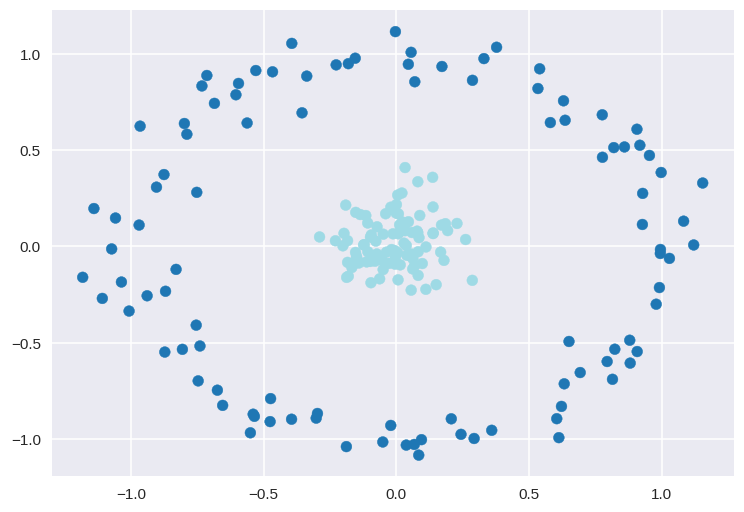

In [3]:
from sklearn.datasets import make_circles
X, y = make_circles(200, factor=.1, noise=.1)

clf = svm.SVC(kernel='linear').fit(X, y)

plt.style.use("seaborn")
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='tab20')
plt.gcf().set_dpi(110)

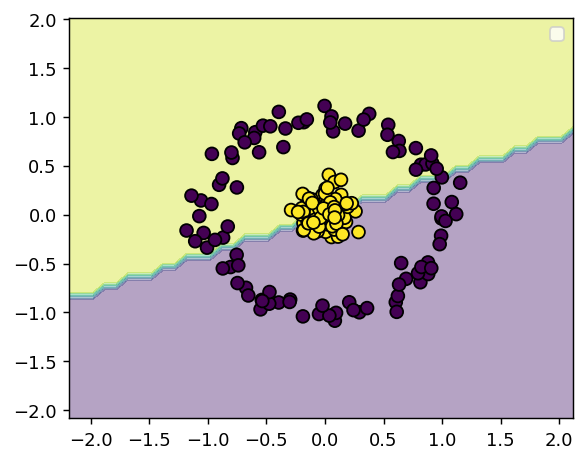

In [4]:
plt.style.use("default")
clf = svm.LinearSVC()
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, [0, 1], clf)

However, if we artificially add another dimention to the dataset of the form:

$z = x^2 + y^2$
we can clearly see a hyperplane that can distinguish both the datasets:

In [ ]:
Z = np.array([[i[0]**2 + i[1]**2] for i in X])

In [ ]:
X_new = np.hstack((X, Z))

In [ ]:
import plotly.graph_objects as go


In [ ]:
fig = go.Figure(data = [go.Scatter3d(
    x = X_new[:, 0],
    y = X_new[:, 1],
    z = X_new[:, 2],
    mode = "markers",
    marker = {
        "color" : y,
        "line": {"width" : 4, "color":'DarkSlateGrey'},
        "colorscale": "viridis"},
)])

fig.show()

That simple trick has helped us to get another dimension in which the data is linearly separable by a hyperplane (in this case, a 2d plane)

---

Now let us use the rbf kernel and use an SVM Classifier.

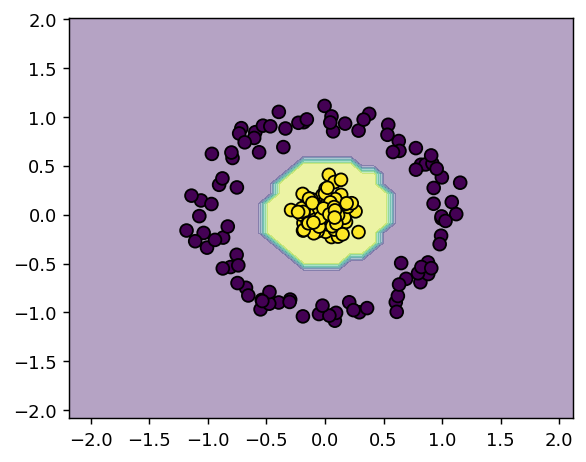

In [ ]:
plt.style.use("default")
clf = svm.SVC()
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, [0, 1], clf)

Now let us get back to our original dataset of iris and see if this kernel trick has helped us:

In [ ]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy of the decision tree on the test set: \n\n{:.3f}\n\n".format(accuracy_score(y_pred, y_test)))

Accuracy of the decision tree on the test set: 

0.974




Certainly, using a kernel has increased our accuracy on the iris dataset.

Things to try out:
- Try to run the same experiment after filtering different features, 2 at a time.
- Using different kinds of kernels for the SVM among: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}

<ipython-input-6-007dbeca474a>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


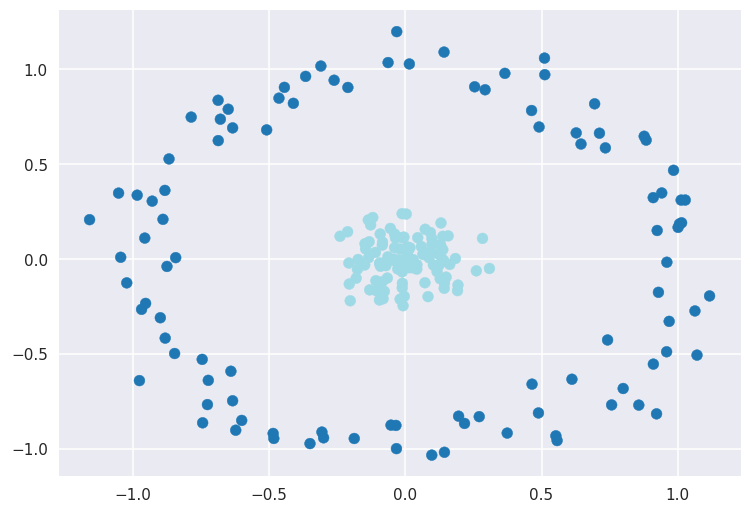

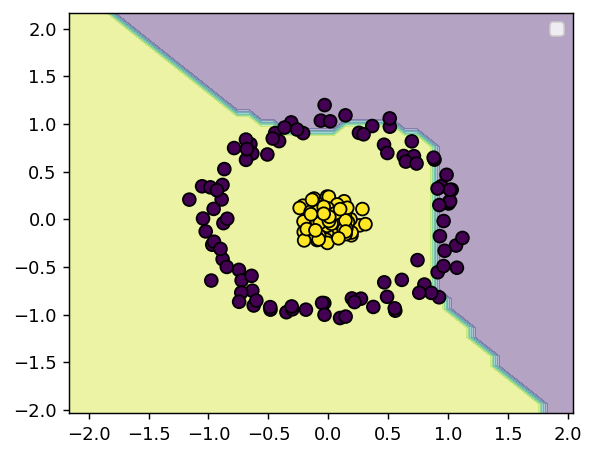

In [6]:
from sklearn.datasets import make_circles
X, y = make_circles(200, factor=.1, noise=.1)

clf = svm.SVC(kernel='poly').fit(X, y)

plt.style.use("seaborn")
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='tab20')
plt.gcf().set_dpi(110)

plt.style.use("default")
clf = clf = svm.SVC(kernel='poly')
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, [0, 1], clf)